# *ENSAYO*

En el presente artículo "The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment" desarrolla la 
respuesta a la presente pregunta de de investigación **¿mudarse a un vecindario de menor pobreza impacta en la vida de los niños involucrados?**. Este surgue ante el hecho de que personas que viven en vecindarios de alta pobreza obtienen peores resultados económicos, sanitarios y educativos, esto en contraste a las personas que viven y crecen en vecindarios mpas acomodados.

Una de las principales fortalezas del presente artículo es que permite analizar bastantes datos y que dan una respuesta positiva a largo plazo para niños menores de 13 años que crecen en un vecindarios menos pobre, como mayor tasa de asistencia a la universidad, viven en mejores lugares, menos probabilidad de que sean padres solteros. No obstante, una debilidad de este proyecto es que el resultado no es igual de positivo para niños mayores de 13 años, jóvenes y adultos.

Por último, me parece que los pasos a seguir para desarrollar y dar una mejor respuesta a la pregunta son investigar más a fondo si hay un rango de edad específco debajo de los 13 años, de manera que el resultado sea más favorable a futuro; y, también, investigar si hay alguna forma de que los jóvenes y adultos no se vean tan afectados negativamente.

# *CODIFICACIÓN*

Colaboradores:

DANIEL CUBEÑAS (20170718)
INGRY BERNEL (20191301)

In [25]:
#Antes de pasar a la parte de códigos en Python, procederemos a instalar las librerías correspondientes

import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib
import string
import warnings
warnings.filterwarnings('ignore')

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

In [5]:
pip install causalgraphicalmodels

In [9]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')


In [10]:
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [11]:
# Ahora, creamos una columna extra para clasificar
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

In [12]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [13]:
data_2.groupby(["class_format"]).mean() #get the exam's mean

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


Text(0.5, 8.95999999999998, '$Notas$')

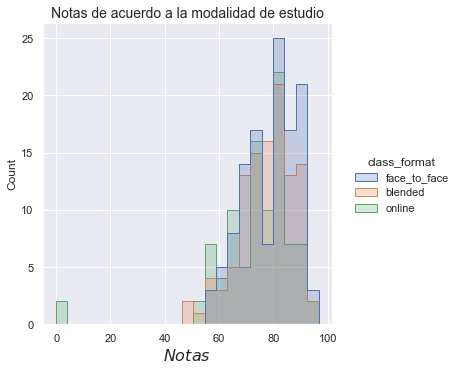

In [14]:
#Ploteamos un histograma que compare las tres modalides de estudio (grupal)
sns.displot(data_2, x="falsexam",hue="class_format", element = "step")

plt.title("Notas de acuerdo a la modalidad de estudio", fontsize=14)
plt.xlabel("$Notas$", fontsize=16)

INTERPRETACIÓN:

Enfocandonos en los histrogramas ploteados, podemos interpretar que el promedio de notas de los alumnos que asistieron a clases presenciales (face to face = 78.54) es mayor a la de los alumnos que tomaron clases virtuales (online = 73.63) y a los alumnos que tomas clases híbridas.

En consecuencia, en el histograma grupal, donde se aprecian las tres variables, se puede afirmar lo siguiente: los estudiantes obtienen mejores notas en las clases virtuales.

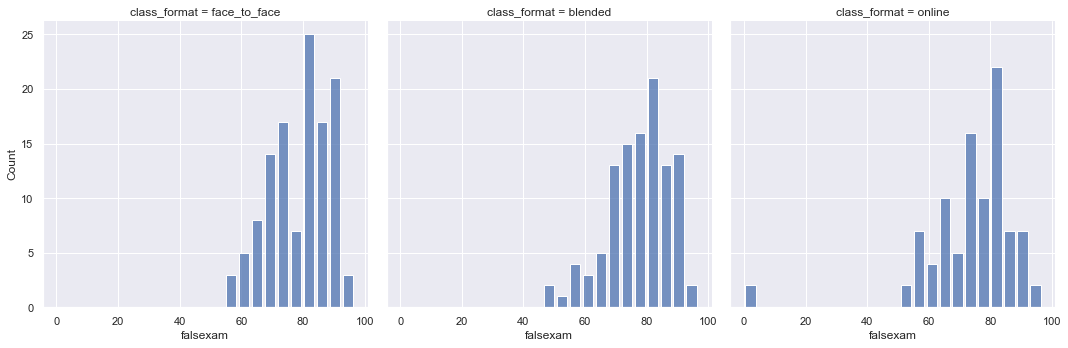

In [15]:
#Histogrmas por modalidades de estudio (por se parado)
sns.displot(data=data_2, x="falsexam", col="class_format", shrink=0.8)

In [16]:
#Ahora, creamos de listas
class_format = ["face_to_face","online"]
format_ol= [0.0,1.0]
format_face_to_face= [1.0,0.0]
falsexam= [78.547485,73.635263]

In [17]:
#Generamos un diccionario
grades = {"Class_format": class_format, "Format_ol":format_ol, "Format_face_to_face":format_face_to_face, "Falsexam":falsexam}
grades

{'Class_format': ['face_to_face', 'online'],
 'Format_ol': [0.0, 1.0],
 'Format_face_to_face': [1.0, 0.0],
 'Falsexam': [78.547485, 73.635263]}

In [18]:
data_3 = pd.DataFrame(grades) # nombre_data = pd.DataFrame(diccionario)
data_3

,Class_format,Format_ol,Format_face_to_face,Falsexam
0,face_to_face,0.0,1.0,78.547485
1,online,1.0,0.0,73.635263


In [19]:
# Y(1)- Y(0) = ATE Average Treatment Effect - Causal 
# Y(1) -> online, Y(0) -> face_to_face
73.635263 - 78.547485

-4.912222

INTERPRETACIÓN:

Se puede observar que las clases presenciales tinen una puntuación media de 78,54, pero, por otro lado, los cursos en línea tienen una puntuación media de 73,63. Ello no es un resultado tan positivo para quienes apoyan el aprendizaje en línea. ya que, según los resultados, el aprendizaje en línea genera que los estudiantes rindan 5 puntos menos de media.

**Difference-in-means estimator via linear regression**

In [20]:
result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,77.8555,0.762,102.235,0.000,76.357,79.354
format_ol,-4.2203,1.412,-2.990,0.003,-6.998,-1.443


In [21]:
(data
 .groupby("format_ol")
 ["falsexam"]
 .mean())

format_ol
0    77.855523
1    73.635263
Name: falsexam, dtype: float64

Se realiza una regresión lineal, considerando Y = Las notas, T = Dummy creada para el tipo de clase.

Y = beta_0 + beta_1*T + e.

El valor que encuentren para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.

In [22]:
X = data[["format_ol"]].assign(intercep=1)
y = data["falsexam"]

def regress(y, X): 
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta = regress(y, X)
beta

array([-4.22026036, 77.85552345])